## Imports:

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, RocCurveDisplay
import seaborn as sns

## Data:

In [26]:
data = pd.read_csv("CANCER_TABLE.csv")
data.head()

,diameter (cm),cancer
0,6.309685,False
1,4.580894,False
2,6.310071,False
3,7.495139,False
4,2.216181,False


In [32]:
data['prediction'] = data['diameter (cm)'] > 7
data.head()

,diameter (cm),cancer,prediction
0,6.309685,False,False
1,4.580894,False,False
2,6.310071,False,False
3,7.495139,False,True
4,2.216181,False,False


In [33]:
data.columns = ['diameter', 'cancer', 'prediction']

## Q1: Calculate Confusion Matrix:

In [20]:
cm = confusion_matrix(data['cancer'], data['prediction'], labels=[True,False])

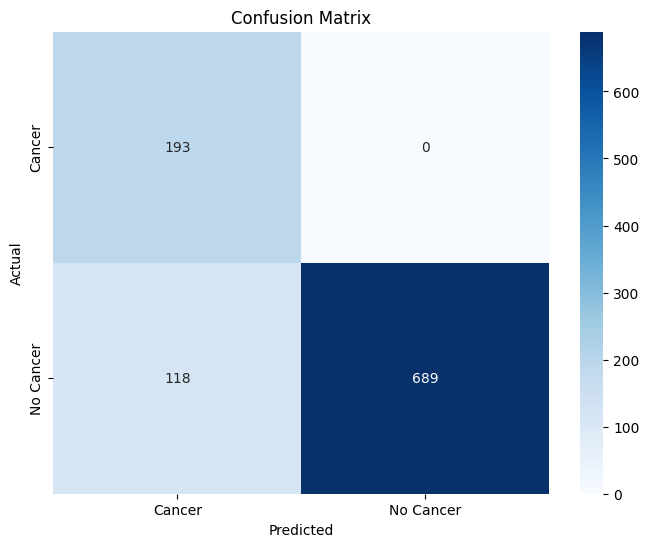

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cancer','No Cancer'], yticklabels=['Cancer','No Cancer'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Q2: Calculate FP, TP, FN, TN:

In [22]:
TP = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TN = cm[1][1]
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

True Positives (TP): 193
False Positives (FP): 118
False Negatives (FN): 0
True Negatives (TN): 689


**Explaination:** The business implication is that a model that classifies sick and non-sick people should not have FN not to miss patients. We also want the FP to be as low as possible so not to cause patients to receive treatments they don't need. And as with any model, we want as many correct answers as possible.

## Q3: Calculate TPR and FPR:

In [23]:
TPR = TP / (TP + FN)  # Sensitivity or Recall
FPR = FP / (FP + TN)
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Positive Rate (FPR): {FPR}")

True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 0.14622057001239158


**Explaination:**
1. The True Positive Rate (TPR), also known as Sensitivity or Recall, measures the proportion of actual positive cases that are correctly identified by the model.
In the cancer detection context, TPR represents how well the model identifies individuals who will develop cancer. A high TPR means fewer cancer cases are missed, which is critical for timely treatment and saving lives.

2. The False Positive Rate (FPR) measures the proportion of actual negative cases that are incorrectly classified as positive by the model.
In the cancer detection context, FPR represents how often the model falsely alarms individuals who do not have cancer. A high FPR can lead to unnecessary stress for patients and additional medical tests, which may waste resources and time.

## Q4 & Q5: Calculate Accuracy, Precision, Recall and F1 score:

In [24]:
accuracy = accuracy_score(data['cancer'], data['prediction'])
precision = precision_score(data['cancer'], data['prediction'])
recall = recall_score(data['cancer'], data['prediction'])  # Same as TPR
f1 = f1_score(data['cancer'], data['prediction'])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.882
Precision: 0.6205787781350482
Recall: 1.0
F1 Score: 0.7658730158730159


**Explaination - Q6:** Such a model can be good because the model have high recall equal 1 that means the model doesn't miss sick people and the accuracy is high means to catch sick people as sick and non sick as non sick is high.

## Q7: Plot ROC:

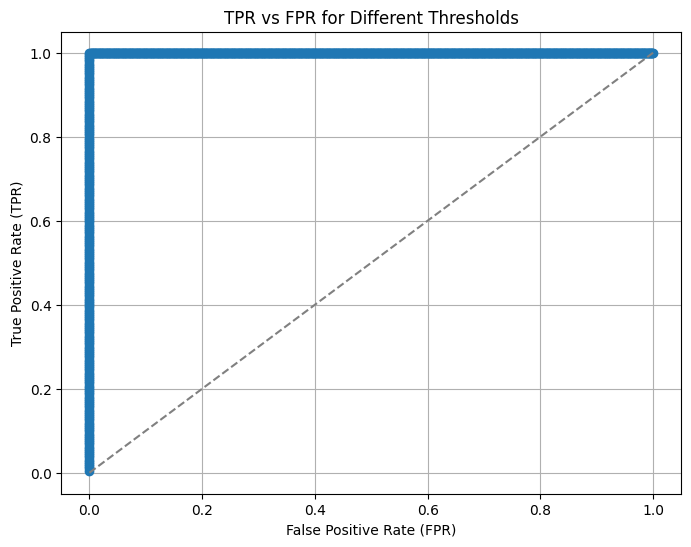

In [35]:
tpr_list = []
fpr_list = []
thresholds = sorted(data["diameter"].unique())
for threshold in thresholds:
    data["prediction"] = data["diameter"].apply(lambda x: True if x >= threshold else False)
    y_true = data["cancer"].astype(bool)
    y_pred = data["prediction"]
    cm = confusion_matrix(y_true, y_pred, labels=[True, False])
    TP, FP, FN, TN= cm[0][0], cm[1][0], cm[0][1], cm[1][1]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    tpr_list.append(TPR)
    fpr_list.append(FPR)
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, marker='o', label="TPR vs FPR (Thresholds)")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("TPR vs FPR for Different Thresholds")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.grid(True)
plt.show()

## Q8: Calculate AUC:

In [37]:
roc_auc = auc(fpr_list,tpr_list)
print(f"Area Under Curve (AUC): {roc_auc}")

Area Under Curve (AUC): 1.0


**Explaination:** The model is excellent because the larger the AUC, the more accurate the model and the less error in the classifications it gives. The range is between 0 and 1. 0 is random and 1 is excellent.

## Q9: Change Model from ranking model to classification model:

In [40]:
optimal_idx = np.argmax(np.array(tpr_list) - np.array(fpr_list))
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 8.02744867175


In [47]:
# New Classification model according to ranking model:
data['prediction'] = data['diameter'] >= optimal_threshold

**Explaination:** The model classify like regression who is above is sick and under the regression line is healthy. I take the optimal number that seerate the people in the best way according to ROC curve.

## Q10: Make Confusion Matrix:

In [50]:
new_cm = confusion_matrix(data['cancer'], data['prediction'], labels=[True,False])

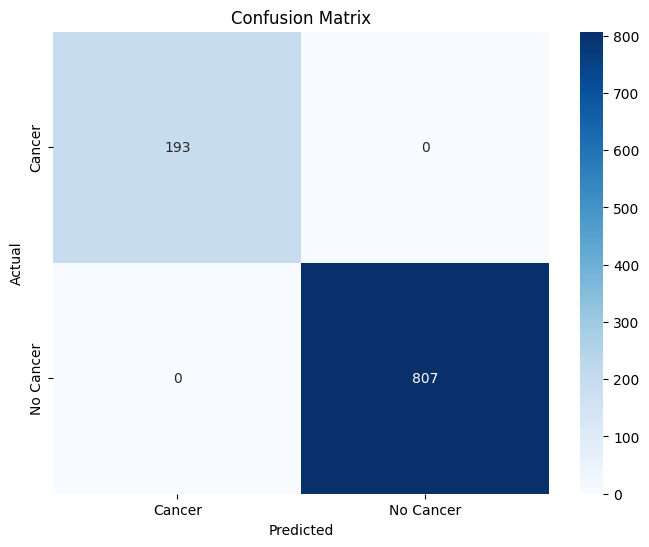

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cancer','No Cancer'], yticklabels=['Cancer','No Cancer'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Q11: Calculate FP, TP, FN, TN, TPR, FPR and all matrices:

In [53]:
TP = new_cm[0][0]
FP = new_cm[1][0]
FN = new_cm[0][1]
TN = new_cm[1][1]
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print(f"True Positive Rate (TPR): {TPR}")
print(f"False Positive Rate (FPR): {FPR}")
accuracy = accuracy_score(data['cancer'], data['prediction'])
precision = precision_score(data['cancer'], data['prediction'])
recall = recall_score(data['cancer'], data['prediction'])  # Same as TPR
f1 = f1_score(data['cancer'], data['prediction'])
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

True Positives (TP): 193
False Positives (FP): 0
False Negatives (FN): 0
True Negatives (TN): 807
True Positive Rate (TPR): 1.0
False Positive Rate (FPR): 0.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**Explaination - Q12:** All the measures in the new model is 1 that means that this is the idial model for this problem and its better than previous model that was wrong in some samples. Therefore, I choose the second model.

## Q13 - Calcualte ROC:

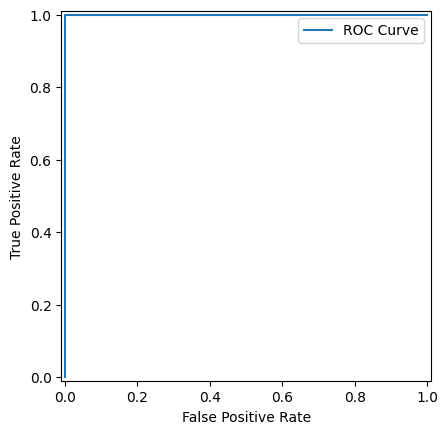

In [63]:
fpr, tpr, thresholds = roc_curve(data["cancer"], data["prediction"])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(label="ROC Curve")
plt.legend()
plt.show()